#Geron 14.9.
Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

In [1]:
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(0, 255, 0, 255)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

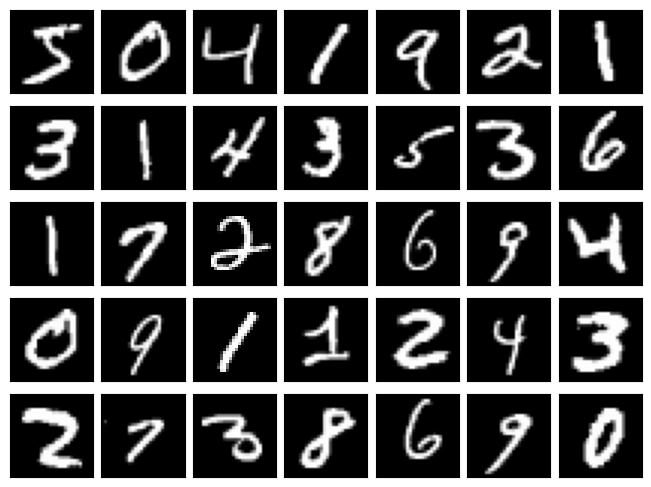

In [ ]:
fig, ax = plt.subplots(5, 7,
                       subplot_kw={'xticks':[], 'yticks':[]},
                       layout='constrained')

for i in range(5):
    for j in range(7):
        ax[i, j].imshow(X_train[i*7+j], cmap='gray')

In [7]:
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Try a simple CNN

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(100, (3, 3), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Flatten()
layer4 = keras.layers.Dense(100, activation="sigmoid")
layerO = keras.layers.Dense(10, activation="softmax")

layers = [layerI, layer1, layer2, layer3, layer4, layerO]
model = keras.models.Sequential(layers)

# opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer='adam',
    # optimizer=opt,
    loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    # batch_size=50,
                    validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9066 - loss: 0.3595 - val_accuracy: 0.9801 - val_loss: 0.0737
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9831 - loss: 0.0616 - val_accuracy: 0.9835 - val_loss: 0.0557
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0312 - val_accuracy: 0.9843 - val_loss: 0.0511
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9968 - loss: 0.0161 - val_accuracy: 0.9840 - val_loss: 0.0508
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9986 - loss: 0.0088 - val_accuracy: 0.9852 - val_loss: 0.0493
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9987 - loss: 0.0064 - val_accuracy: 0.9858 - val_loss: 0.0483
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9995 - loss: 0.0035 - val_accuracy: 0.9850 - val_loss: 0.0552
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9996 - loss: 0.0032 - 

In [ ]:
loss_te, acc_te = model.evaluate(X_test, y_test)
print("Testing accuracy  : {0:.4f}".format(acc_te))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9840 - loss: 0.0866
Testing accuracy  : 0.9868


# Add dropout to reduce overfitting

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(100, (3, 3), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Flatten()
layerD1 = keras.layers.Dropout(0.3)
layer4 = keras.layers.Dense(100, activation="sigmoid")
layerD2 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(10, activation="softmax")

layers = [layerI, layer1, layer2, layer3, layerD1, layer4, layerD2, layerO]
model = keras.models.Sequential(layers)

model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    # batch_size=50,
                    validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8586 - loss: 0.5097 - val_accuracy: 0.9759 - val_loss: 0.0851
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9654 - loss: 0.1263 - val_accuracy: 0.9811 - val_loss: 0.0647
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.0961 - val_accuracy: 0.9836 - val_loss: 0.0563
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9779 - loss: 0.0737 - val_accuracy: 0.9846 - val_loss: 0.0505
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9821 - loss: 0.0623 - val_accuracy: 0.9854 - val_loss: 0.0502
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0527 - val_accuracy: 0.9862 - val_loss: 0.0510
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9853 - loss: 0.0484 - val_accuracy: 0.9848 - val_loss: 0.0504
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0403

In [ ]:
loss_te, acc_te = model.evaluate(X_test, y_test)
print("Testing accuracy  : {0:.4f}".format(acc_te))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9866 - loss: 0.0539
Testing accuracy  : 0.9884


# Try a more complicated model

In [11]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dropout(0.3)
layer7 = keras.layers.Dense(100, activation="sigmoid")
layer8 = keras.layers.Dropout(0.5)
layerO = keras.layers.Dense(10, activation="softmax")

layers = [layerI, layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layerO]
model = keras.models.Sequential(layers)

model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30,
                    # batch_size=50,
                    validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8393 - loss: 0.5515 - val_accuracy: 0.9802 - val_loss: 0.0700
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9653 - loss: 0.1214 - val_accuracy: 0.9855 - val_loss: 0.0476
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9748 - loss: 0.0895 - val_accuracy: 0.9873 - val_loss: 0.0442
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9790 - loss: 0.0696 - val_accuracy: 0.9900 - val_loss: 0.0351
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9821 - loss: 0.0605 - val_accuracy: 0.9905 - val_loss: 0.0335
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0557 - val_accuracy: 0.9908 - val_loss: 0.0339
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9841 - loss: 0.0534 - val_accuracy: 0.9911 - val_loss: 0.0324
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9869 - loss: 0.0432 - 

In [13]:
loss_te, acc_te = model.evaluate(X_test, y_test)
print("Testing accuracy  : {0:.4f}".format(acc_te))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9901 - loss: 0.0344
Testing accuracy  : 0.9925


# No input layer

In [14]:
tf.keras.backend.clear_session()
tf.random.set_seed(8964)

layerI = keras.layers.Input(shape=X_train.shape[1:])
layer1 = keras.layers.Conv2D(100, (3, 3), activation="relu", kernel_initializer="he_normal")
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Flatten()
layer4 = keras.layers.Dense(100, activation="sigmoid")
layerO = keras.layers.Dense(10, activation="softmax")

layers = [
    # layerI,
    layer1, layer2, layer3, layer4, layerO]
model = keras.models.Sequential(layers)

# opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer='adam',
    # optimizer=opt,
    loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=30,
                    # batch_size=50,
                    validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9065 - loss: 0.3475 - val_accuracy: 0.9811 - val_loss: 0.0713
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9821 - loss: 0.0631 - val_accuracy: 0.9820 - val_loss: 0.0594
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9918 - loss: 0.0314 - val_accuracy: 0.9846 - val_loss: 0.0502
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9965 - loss: 0.0159 - val_accuracy: 0.9830 - val_loss: 0.0553
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9989 - loss: 0.0082 - val_accuracy: 0.9844 - val_loss: 0.0531
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9992 - loss: 0.0052 - val_accuracy: 0.9858 - val_loss: 0.0525
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9987 - loss: 0.0057 - val_accuracy: 0.9837 - val_loss: 0.0589
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9996 - loss: 0.0033 -

In [16]:
loss_te, acc_te = model.evaluate(X_test, y_test)
print("Testing accuracy  : {0:.4f}".format(acc_te))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9845 - loss: 0.0932
Testing accuracy  : 0.9880


# Stop

In [17]:
from google.colab import runtime
runtime.unassign()